# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 100.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 41.0 MB/s eta 0:00:00
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080076 sha256=4e7e36cc2a5da83773a227f64c2f9f249e658b4c82786e08a613efcfb447c292
  Stored in directory: /root/.cache/pip/wheels/0e/c4/ce/fecee9e6406e166eaba4e09b1acd2096a84ffef5275ea90806
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.6.3
    Uninstalling bokeh-3.6.3:
      Successfully uninstalled bokeh-3.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 1.6.1 requires bokeh<3.7.0

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "markabrenio"
kaggle_key = "601f0d9441f95d9613cb23c41d9d0244"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 62.9MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
#train = ?
#train.head()

train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
#test = ?
#test.head()

test = pd.read_csv("test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
#submission = ?
#submission.head()

submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
train = train.drop('casual', axis=1)
train = train.drop('registered', axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
#predictor = TabularPredictor(?).fit(?)
predictor = TabularPredictor(label="count", problem_type="regression", eval_metric="rmse").fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20250303_161628"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.15 GB / 12.67 GB (80.1%)
Disk Space Avail:   72.46 GB / 107.72 GB (67.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be f

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -54.968199  root_mean_squared_error      22.844748  394.524840                0.000862           0.044213            3       True         11
1          LightGBM_BAG_L2  -55.050708  root_mean_squared_error      17.393093  312.018017                0.305390          38.308409            2       True         10
2        LightGBMXT_BAG_L2  -60.403650  root_mean_squared_error      22.538496  356.172218                5.450792          82.462610            2       True          9
3    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.098159    0.068870                0.098159           0.068870            1       True          2
4      WeightedEnsemble_L2  -84.125061  root_mean_squared_error       0.099115    0.094386   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -131.07794521825664,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2': -60.40

In [ ]:
predictor.evaluate_accuracy()

AttributeError: 'TabularPredictor' object has no attribute 'evaluate_accuracy'

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -55.046145  root_mean_squared_error      19.880108  397.757194                0.000912           0.061677            3       True         11
1          LightGBM_BAG_L2  -55.146182  root_mean_squared_error      14.031872  313.906519                0.496837          46.196692            2       True         10
2        LightGBMXT_BAG_L2  -60.150407  root_mean_squared_error      19.382360  351.498824                5.847324          83.788998            2       True          9
3    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.128121    0.071378                0.128121           0.071378            1       True          2
4      WeightedEnsemble_L2  -84.125061  root_mean_squared_error       0.130008    0.126569   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -131.06129252819213,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2': -60.15

### Create predictions from test dataset

In [ ]:
#predictions = ?
#predictions.head()

predictions = predictor.predict(test)
predictions.head()

,count
0,37.354538
1,45.857391
2,49.715919
3,52.912556
4,53.717567


In [ ]:
preds = predictor.predict(train)

from sklearn.metrics import root_mean_squared_error
mse = root_mean_squared_error(train["count"], preds)
print(mse)

86.12537514631273


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,100.151268
std,90.292694
min,0.231500
25%,16.450321
50%,63.338470
75%,172.691360
max,372.900391


In [ ]:
# How many negative values do we have?
#print("zero")
number_of_negatives = (predictions < 0).sum()
print(number_of_negatives)

0


In [ ]:
# Set them to zero
predictions = predictions.clip(lower=0)

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 753kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2025-03-03 16:30:45  first raw submission               complete  1.83644      1.83644       
submission_new_hpo_4.csv     2025-03-03 16:05:39  larger nueral network HPO          complete  0.55657      0.55657       
submission_new_hpo_3.csv     2025-03-02 16:59:27  new features                       complete  0.54060      0.54060       
submission_new_hpo_2.csv     2025-03-02 16:50:38  new features                       complete  0.55004      0.55004       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

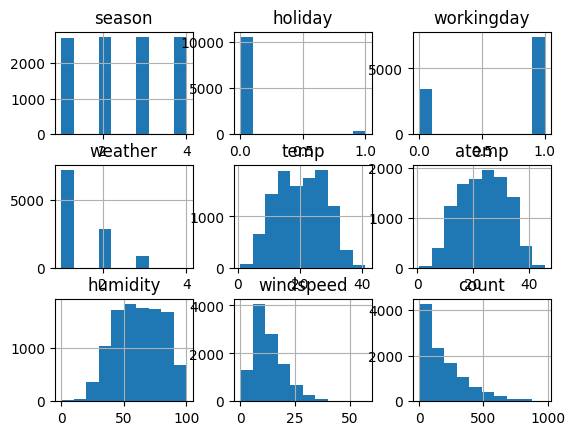

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [ ]:
# create a new feature
#train[?] = ?
#test[?] = ?

#TURNING THE DAT HOUR AND MONTH INTO NEW FEATURES actually lowers our score.
#I think its because the new version of autogluon automaticlaly parses these out into integers

train_hours = pd.to_datetime(train['datetime']).dt.hour
test_hours = pd.to_datetime(test['datetime']).dt.hour

train_days = pd.to_datetime(train['datetime']).dt.day
test_days = pd.to_datetime(test['datetime']).dt.day

train_months = pd.to_datetime(train['datetime']).dt.month
test_months = pd.to_datetime(test['datetime']).dt.month

train["hours"] = train_hours
train["days"] = train_days
train["months"] = train_months

test["hours"] = test_hours
test["days"] = test_days
test["months"] = test_months

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hours,days,months
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hours,days,months
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,20,1
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,20,1
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,20,1
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,20,1


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
#train["season"] = ?
#train["weather"] = ?
#test["season"] = ?
#test["weather"] = ?

train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hours,days,months
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1


array([[<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hours'}>,
        <Axes: title={'center': 'days'}>],
       [<Axes: title={'center': 'months'}>, <Axes: >, <Axes: >]],
      dtype=object)

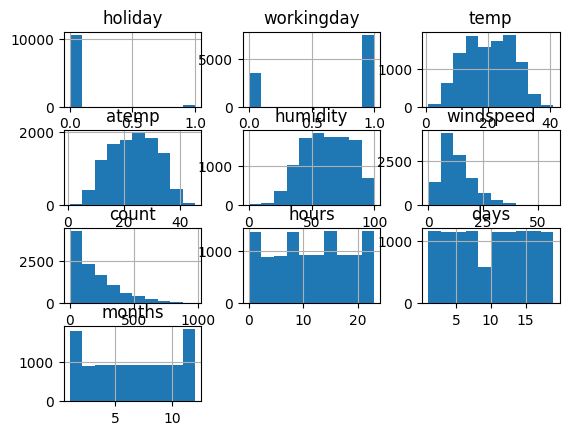

In [ ]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
#predictor_new_features = TabularPredictor(?).fit(?)

#TURNING THE DAT HOUR AND MONTH INTO NEW FEATURES actually lowers our score.
#I think its because the new version of autogluon automaticlaly parses these out into integers

predictor_new_features = TabularPredictor(label="count", problem_type="regression", eval_metric="rmse").fit(train_data=train, time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20250303_163153"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.63 GB / 12.67 GB (76.0%)
Disk Space Avail:   71.71 GB / 107.72 GB (66.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

In [ ]:
preds = predictor_new_features.predict(train) #RMSE for new features model

from sklearn.metrics import root_mean_squared_error
mse = root_mean_squared_error(train["count"], preds)
print(mse)

15.80148465584497


In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.304506  root_mean_squared_error      29.467735  401.081876                0.000889           0.051482            3       True         11
1          LightGBM_BAG_L2  -30.650229  root_mean_squared_error      26.964288  298.990233                0.623878          44.180105            2       True          9
2        LightGBMXT_BAG_L2  -30.996564  root_mean_squared_error      28.080725  307.930246                1.740315          53.120118            2       True          8
3   RandomForestMSE_BAG_L2  -31.685904  root_mean_squared_error      27.102652  303.730170                0.762242          48.920042            2       True         10
4      WeightedEnsemble_L2  -32.419553  root_mean_squared_error      25.984158  200.598462   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.51903091052072,
  'LightGBM_BAG_L1': -33.916920183145294,
  'RandomForestMSE_BAG_L1': -38.40890681984868,
  'CatBoost_BAG_L1': -38.99430966190244,
  'WeightedEnsemble_L2': -32.419552668761895,
  'LightGBMXT_BAG_L2': -30.996563702912443,
  'LightGBM_BAG_L2': -30.65022

In [ ]:
predictions_second = predictor_new_features.predict(test)
predictions_second.describe()

,count
count,6493.000000
mean,163.235504
std,144.809708
min,1.765196
25%,49.728539
50%,125.657730
75%,235.196625
max,810.858521


In [ ]:
# Remember to set all negative values to zero
#?
#number_of_negatives = (predictions_second < 0).sum()
#print(number_of_negatives)

predictions_second = predictions_second.clip(lower=0)

In [ ]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv")
#submission.head()

submission_new_features["count"] = predictions_second
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 751kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 9

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2025-03-03 16:44:19  new features                       complete  0.62941      0.62941       
submission.csv               2025-03-03 16:30:45  first raw submission               complete  1.83644      1.83644       
submission_new_hpo_4.csv     2025-03-03 16:05:39  larger nueral network HPO          complete  0.55657      0.55657       
submission_new_hpo_3.csv     2025-03-02 16:59:27  new features                       complete  0.54060      0.54060       
submission_new_hpo_2.csv     2025-03-02 16:50:38  new features                       complete  0.55004      0.55004       
submission_new_hpo.csv       2025-03-02 16:37:54  new features                       complete  0.50321      0.50321       
submission_new_f

#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
#FIRST HYPER PARAMETER TUNE TEST, mostly curious about the num_boost_round so well try that for these tests

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    #'num_leaves': space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

WeightedEnsemble_L3_options = {
    'ensemble_size': 70

}

nn_options = {
    'hidden_size' : 256,
    'num_layers' : 10
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                     'ENS_WEIGHTED': WeightedEnsemble_L3_options,
                   #'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

#time_limit = 2*60  # train various models for ~2 min
num_trials = 10  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}  # Refer to TabularPredictor.fit docstring for all valid values

#predictor_new_hpo = TabularPredictor(?).fit(?)

#hyperparameters={"GBM": {}, "LR": {}})

predictor_new_hpo = TabularPredictor(label="count", problem_type="regression", eval_metric="rmse").fit(train_data=train, time_limit=600, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs='auto')

No path specified. Models will be saved in: "AutogluonModels/ag-20250303_164642"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.55 GB / 12.67 GB (75.4%)
Disk Space Avail:   71.01 GB / 107.72 GB (65.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

In [ ]:
preds = predictor_new_hpo.predict(train) #RMSE for new features model, with modified HPO

from sklearn.metrics import root_mean_squared_error
mse = root_mean_squared_error(train["count"], preds)
print(mse)

23.852775665038234


In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3  -34.956003  root_mean_squared_error       1.900561  242.711396                0.000748           0.038914            3       True         12
1       WeightedEnsemble_L2  -35.130099  root_mean_squared_error       0.894554  112.650928                0.000978           0.025611            2       True          8
2   WeightedEnsemble_BAG_L2  -35.149663  root_mean_squared_error       1.148874  163.825923                0.014585          13.675512            2       True         11
3        LightGBM_BAG_L2/T1  -35.460258  root_mean_squared_error       1.731816  190.227267                0.597528          40.076856            2       True          9
4        LightGBM_BAG_L1/T7  -35.706253  root_mean_squared_error       0.332217   36.918

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T7': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_BAG_L2': 'StackerEnsembleModel',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -41.32539093341285,
  'LightGBM_BAG_L1/T2': -36.06588228505419,
  'LightGBM_BAG_L1/T3': -38.74566357385997,
  'LightGBM_BAG_L1/T4': -111.8718779296635,
  'LightGBM_BAG_L1/T5': -36.22265633498358,
  'LightGBM_BAG_L1/T6': -56.91784426434886,
  'LightGBM_BAG_L1/T7': -35.7062531238601,
  'WeightedEnsemble_L2': -35.130098

In [ ]:
#submission = pd.read_csv("sampleSubmission.csv")
#submission["count"] = predictions
#submission.to_csv("submission.csv", index=False)

predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo = predictions_new_hpo.clip(lower=0)

submission = pd.read_csv("sampleSubmission.csv")
submission["count"] = predictions_new_hpo
submission.to_csv("submission_new_hpo.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "MODIFY HYPERPARAMETERS FOR SUBMIT"

100% 188k/188k [00:00<00:00, 798kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 9

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2025-03-03 16:56:56  MODIFY HYPERPARAMETERS FOR SUBMIT  complete  0.50321      0.50321       
submission_new_features.csv  2025-03-03 16:44:19  new features                       complete  0.62941      0.62941       
submission.csv               2025-03-03 16:30:45  first raw submission               complete  1.83644      1.83644       
submission_new_hpo_4.csv     2025-03-03 16:05:39  larger nueral network HPO          complete  0.55657      0.55657       
submission_new_hpo_3.csv     2025-03-02 16:59:27  new features                       complete  0.54060      0.54060       
submission_new_hpo_2.csv     2025-03-02 16:50:38  new features                       complete  0.55004      0.55004       
submission_new_h

In [ ]:
#lets try with slightly different hyperparameters

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 500,  # number of boosting rounds (controls training time of GBM models)
    #'num_leaves': space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

WeightedEnsemble_L3_options = {
    'ensemble_size': 70

}

nn_options = {
    'hidden_size' : 256,
    'num_layers' : 10
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                     'ENS_WEIGHTED': WeightedEnsemble_L3_options,
                   #'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

#time_limit = 2*60  # train various models for ~2 min
num_trials = 10  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}  # Refer to TabularPredictor.fit docstring for all valid values


predictor_new_hpo_2 = TabularPredictor(label="count", problem_type="regression", eval_metric="rmse").fit(train_data=train, time_limit=600, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs='auto')

No path specified. Models will be saved in: "AutogluonModels/ag-20250302_163838"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.86 GB / 12.67 GB (77.8%)
Disk Space Avail:   71.21 GB / 107.72 GB (66.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

In [ ]:
predictor_new_hpo_2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2 -33.342861  root_mean_squared_error       7.341083  181.963556                0.000935           0.034109            2       True          7
1       WeightedEnsemble_L3 -33.372491  root_mean_squared_error       7.354413  194.627669                0.000957           0.029980            3       True         11
2   WeightedEnsemble_BAG_L2 -33.393439  root_mean_squared_error       7.353456  194.597689                0.013308          12.668242            2       True         10
3        LightGBM_BAG_L1/T5 -34.150438  root_mean_squared_error       2.733959   44.389398                2.733959          44.389398            1       True          5
4        LightGBM_BAG_L1/T2 -34.160824  root_mean_squared_error       1.001391   45.462736   

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_BAG_L2': 'StackerEnsembleModel',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -35.09563444345536,
  'LightGBM_BAG_L1/T2': -34.160823809712056,
  'LightGBM_BAG_L1/T3': -34.302166968986704,
  'LightGBM_BAG_L1/T4': -42.74495272943767,
  'LightGBM_BAG_L1/T5': -34.15043849084698,
  'LightGBM_BAG_L1/T6': -34.73057894819092,
  'WeightedEnsemble_L2': -33.34286132891295,
  'LightGBM_BAG_L2/T1': -34.18417671381243,
  'LightGBM_BAG_L2/T2': -34.93000001044

In [ ]:
predictions_new_hpo_2 = predictor_new_hpo_2.predict(test)
predictions_new_hpo_2 = predictions_new_hpo_2.clip(lower=0)

submission = pd.read_csv("sampleSubmission.csv")
submission["count"] = predictions_new_hpo_2
submission.to_csv("submission_new_hpo_2.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_2.csv -m "new features"

100% 188k/188k [00:00<00:00, 683kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 9

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo_2.csv     2025-03-02 16:50:38  new features                       complete  0.55004      0.55004       
submission_new_hpo.csv       2025-03-02 16:37:54  new features                       complete  0.50321      0.50321       
submission_new_features.csv  2025-03-02 16:27:26  new features                       complete  1.84256      1.84256       
submission.csv               2025-03-02 15:47:29  first raw submission               complete  1.84256      1.84256       
submission_new_hpo.csv       2025-03-01 17:54:29  new features with hyperparameters  complete  0.54771      0.54771       
submission_new_hpo.csv       2025-03-01 17:37:28  new features with hyperparameters  complete  0.54061      0.54061       
submission_new_h

In [ ]:
gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 1000,  # number of boosting rounds (controls training time of GBM models)
    #'num_leaves': space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

WeightedEnsemble_L3_options = {
    'ensemble_size': 70

}

nn_options = {
    'hidden_size' : 256,
    'num_layers' : 10
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                     'ENS_WEIGHTED': WeightedEnsemble_L3_options,
                   #'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

#time_limit = 2*60  # train various models for ~2 min
num_trials = 10  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}  # Refer to TabularPredictor.fit docstring for all valid values


predictor_new_hpo_3 = TabularPredictor(label="count", problem_type="regression", eval_metric="rmse").fit(train_data=train, time_limit=600, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs='auto')

No path specified. Models will be saved in: "AutogluonModels/ag-20250302_165102"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.87 GB / 12.67 GB (77.8%)
Disk Space Avail:   71.07 GB / 107.72 GB (66.0%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

In [ ]:
predictor_new_hpo_3.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2 -33.101579  root_mean_squared_error       7.360815  155.975296                0.000954           0.027092            2       True          5
1  WeightedEnsemble_BAG_L2 -33.127063  root_mean_squared_error      10.235116  229.672410                0.023328          12.773281            2       True          8
2      WeightedEnsemble_L3 -33.127063  root_mean_squared_error      10.235779  229.695572                0.000662           0.023162            3       True          9
3       LightGBM_BAG_L1/T3 -33.791601  root_mean_squared_error       3.314543   55.242019                3.314543          55.242019            1       True          3
4       LightGBM_BAG_L2/T1 -33.974988  root_mean_squared_error      10.442706  257.319360         

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_BAG_L2': 'StackerEnsembleModel',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -34.289483588625934,
  'LightGBM_BAG_L1/T2': -34.06581747120519,
  'LightGBM_BAG_L1/T3': -33.791600751382404,
  'LightGBM_BAG_L1/T4': -35.750550430946824,
  'WeightedEnsemble_L2': -33.10157859171281,
  'LightGBM_BAG_L2/T1': -33.974987999094715,
  'LightGBM_BAG_L2/T2': -34.68144259812413,
  'WeightedEnsemble_BAG_L2': -33.127063070561775,
  'WeightedEnsemble_L3': -33.127063070561775},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM_BAG_L1/T1': ['LightGBM_

In [ ]:
predictions_new_hpo_3 = predictor_new_hpo_3.predict(test)
predictions_new_hpo_3 = predictions_new_hpo_3.clip(lower=0)

submission = pd.read_csv("sampleSubmission.csv")
submission["count"] = predictions_new_hpo_3
submission.to_csv("submission_new_hpo_3.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_3.csv -m "new features"

100% 188k/188k [00:00<00:00, 698kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 9

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo_3.csv     2025-03-02 16:59:27  new features                       complete  0.54060      0.54060       
submission_new_hpo_2.csv     2025-03-02 16:50:38  new features                       complete  0.55004      0.55004       
submission_new_hpo.csv       2025-03-02 16:37:54  new features                       complete  0.50321      0.50321       
submission_new_features.csv  2025-03-02 16:27:26  new features                       complete  1.84256      1.84256       
submission.csv               2025-03-02 15:47:29  first raw submission               complete  1.84256      1.84256       
submission_new_hpo.csv       2025-03-01 17:54:29  new features with hyperparameters  complete  0.54771      0.54771       
submission_new_h

In [ ]:
preds = predictor_new_hpo_3.predict(train)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train["count"], preds)
print(mse)

233.76155484075633


In [ ]:
#**LETS JUST TRY TO TRIAN A BIG NUERAL NETWORK AND SEE IF THAT GETS A BETTER SCORE

hyperparameters  = {
	'NN_TORCH': [{}, {'activation': 'elu', 'dropout_prob': 0.10077639529843717, 'hidden_size': 256, 'learning_rate': 0.002735937344002146, 'num_layers': 12, 'use_batchnorm': True, 'weight_decay': 1.356433327634438e-12, 'ag_args': {'name_suffix': '_r79', 'priority': -2}}, {'activation': 'elu', 'dropout_prob': 0.11897478034205347, 'hidden_size': 256, 'learning_rate': 0.0010474382260641949, 'num_layers': 12, 'use_batchnorm': False, 'weight_decay': 5.594471067786272e-10, 'ag_args': {'name_suffix': '_r22', 'priority': -7}}],
}

predictor_new_hpo_4 = TabularPredictor(label="count", problem_type="regression", eval_metric="rmse").fit(train_data=train, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs='auto')

No path specified. Models will be saved in: "AutogluonModels/ag-20250303_150450"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.60 GB / 12.67 GB (83.7%)
Disk Space Avail:   72.62 GB / 107.72 GB (67.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be f

+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L1   |
+----------------------------------------------------------+
| Search algorithm                 SearchGenerator         |
| Scheduler                        FIFOScheduler           |
| Number of trials                 1000                    |
+----------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_BAG_L1


2025-03-03 15:28:50,647	INFO timeout.py:54 -- Reached timeout of 539.8837182349205 seconds. Stopping all trials.
2025-03-03 15:28:50,677	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_BAG_L1' in 0.0205s.
2025-03-03 15:29:00,715	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 3 trial(s):
- 09ace24c: FileNotFoundError('Could not fetch metrics for 09ace24c: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_BAG_L1/09ace24c')
- 5562f06c: FileNotFoundError('Could not fetch metrics for 5562f06c: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_BAG_L1/5562f06c')
- e97d0dd0: FileNotFoundError('Could not fetch metrics for e97d0dd0: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_150450/models/Ne


+--------------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_r79_BAG_L1   |
+--------------------------------------------------------------+
| Search algorithm                 SearchGenerator             |
| Scheduler                        FIFOScheduler               |
| Number of trials                 1000                        |
+--------------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_r79_BAG_L1


2025-03-03 15:38:00,848	INFO timeout.py:54 -- Reached timeout of 539.8837182349205 seconds. Stopping all trials.
2025-03-03 15:38:00,872	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_r79_BAG_L1' in 0.0130s.
2025-03-03 15:38:10,888	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 3 trial(s):
- 0ff50c6d: FileNotFoundError('Could not fetch metrics for 0ff50c6d: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_r79_BAG_L1/0ff50c6d')
- 80af2ee9: FileNotFoundError('Could not fetch metrics for 80af2ee9: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_r79_BAG_L1/80af2ee9')
- 89e2c6df: FileNotFoundError('Could not fetch metrics for 89e2c6df: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_1504


+--------------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_r22_BAG_L1   |
+--------------------------------------------------------------+
| Search algorithm                 SearchGenerator             |
| Scheduler                        FIFOScheduler               |
| Number of trials                 1000                        |
+--------------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_r22_BAG_L1


2025-03-03 15:47:11,047	INFO timeout.py:54 -- Reached timeout of 539.8837182349205 seconds. Stopping all trials.
2025-03-03 15:47:11,064	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_r22_BAG_L1' in 0.0107s.
2025-03-03 15:47:21,085	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 3 trial(s):
- acec03ee: FileNotFoundError('Could not fetch metrics for acec03ee: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_r22_BAG_L1/acec03ee')
- a1ca9767: FileNotFoundError('Could not fetch metrics for a1ca9767: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_r22_BAG_L1/a1ca9767')
- 93095b7d: FileNotFoundError('Could not fetch metrics for 93095b7d: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_1504


+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L2   |
+----------------------------------------------------------+
| Search algorithm                 SearchGenerator         |
| Scheduler                        FIFOScheduler           |
| Number of trials                 1000                    |
+----------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_BAG_L2


2025-03-03 15:52:36,192	INFO timeout.py:54 -- Reached timeout of 314.8542837381363 seconds. Stopping all trials.
2025-03-03 15:52:36,214	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_BAG_L2' in 0.0112s.
2025-03-03 15:52:41,463	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 4 trial(s):
- a54c3ee2: FileNotFoundError('Could not fetch metrics for a54c3ee2: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_BAG_L2/a54c3ee2')
- ea64e7a0: FileNotFoundError('Could not fetch metrics for ea64e7a0: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_BAG_L2/ea64e7a0')
- 1e82a585: FileNotFoundError('Could not fetch metrics for 1e82a585: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_150450/models/Ne


+--------------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_r79_BAG_L2   |
+--------------------------------------------------------------+
| Search algorithm                 SearchGenerator             |
| Scheduler                        FIFOScheduler               |
| Number of trials                 1000                        |
+--------------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_r79_BAG_L2


2025-03-03 15:57:56,744	INFO timeout.py:54 -- Reached timeout of 314.8542837381363 seconds. Stopping all trials.
2025-03-03 15:57:56,794	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_r79_BAG_L2' in 0.0485s.
2025-03-03 15:57:59,553	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 4 trial(s):
- 6b4e7b6f: FileNotFoundError('Could not fetch metrics for 6b4e7b6f: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_r79_BAG_L2/6b4e7b6f')
- 6d8fef15: FileNotFoundError('Could not fetch metrics for 6d8fef15: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_r79_BAG_L2/6d8fef15')
- a31db25f: FileNotFoundError('Could not fetch metrics for a31db25f: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_1504


+--------------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_r22_BAG_L2   |
+--------------------------------------------------------------+
| Search algorithm                 SearchGenerator             |
| Scheduler                        FIFOScheduler               |
| Number of trials                 1000                        |
+--------------------------------------------------------------+

View detailed results here: /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_r22_BAG_L2


2025-03-03 16:03:14,598	INFO timeout.py:54 -- Reached timeout of 314.8542837381363 seconds. Stopping all trials.
2025-03-03 16:03:14,617	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_r22_BAG_L2' in 0.0147s.
2025-03-03 16:03:19,168	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 4 trial(s):
- f2476f97: FileNotFoundError('Could not fetch metrics for f2476f97: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_r22_BAG_L2/f2476f97')
- 0cc5ac9d: FileNotFoundError('Could not fetch metrics for 0cc5ac9d: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_150450/models/NeuralNetTorch_r22_BAG_L2/0cc5ac9d')
- 56617255: FileNotFoundError('Could not fetch metrics for 56617255: both result.json and progress.csv were not found at /content/AutogluonModels/ag-20250303_1504

In [ ]:
predictions_new_hpo_4 = predictor_new_hpo_4.predict(test)
predictions_new_hpo_4 = predictions_new_hpo_4.clip(lower=0)

submission = pd.read_csv("sampleSubmission.csv")
submission["count"] = predictions_new_hpo_4
submission.to_csv("submission_new_hpo_4.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_4.csv -m "larger nueral network HPO"

100% 188k/188k [00:00<00:00, 673kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo_4.csv     2025-03-03 16:05:39  larger nueral network HPO          complete  0.55657      0.55657       
submission_new_hpo_3.csv     2025-03-02 16:59:27  new features                       complete  0.54060      0.54060       
submission_new_hpo_2.csv     2025-03-02 16:50:38  new features                       complete  0.55004      0.55004       
submission_new_hpo.csv       2025-03-02 16:37:54  new features                       complete  0.50321      0.50321       
submission_new_features.csv  2025-03-02 16:27:26  new features                       complete  1.84256      1.84256       
submission.csv               2025-03-02 15:47:29  first raw submission               complete  1.84256      1.84256       
submission_new_h

In [ ]:
predictor_new_hpo_4.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                                model  score_val              eval_metric  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0                 WeightedEnsemble_L3 -40.406118  root_mean_squared_error       4.030703  1912.839529                0.001146           0.028764            3       True          8
1      NeuralNetTorch_BAG_L2/a54c3ee2 -40.958957  root_mean_squared_error       2.726664  1642.433239                0.291734         279.627764            2       True          5
2                 WeightedEnsemble_L2 -41.871434  root_mean_squared_error       2.436195  1362.825185                0.001265           0.019709            2       True          4
3      NeuralNetTorch_BAG_L1/09ace24c -42.117217  root_mean_squared_error       0.306108   461.613775                0.306108         461.613775            1       True          1
4  NeuralNetTorch_r79_BAG_L2/6b4e7b6f 

/usr/local/lib/python3.11/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'NeuralNetTorch_BAG_L1/09ace24c': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_r79_BAG_L1/0ff50c6d': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_r22_BAG_L1/acec03ee': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'NeuralNetTorch_BAG_L2/a54c3ee2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_r79_BAG_L2/6b4e7b6f': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_r22_BAG_L2/f2476f97': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'NeuralNetTorch_BAG_L1/09ace24c': -42.1172172828489,
  'NeuralNetTorch_r79_BAG_L1/0ff50c6d': -69.0646304204054,
  'NeuralNetTorch_r22_BAG_L1/acec03ee': -56.09766957796903,
  'WeightedEnsemble_L2': -41.87143406864093,
  'NeuralNetTorch_BAG_L2/a54c3ee2': -40.958956562206545,
  'NeuralNetTorch_r79_BAG_L2/6b4e7b6f': -43.504372936705494,
  'NeuralNetTorch_

In [ ]:
'''
predictor_new_hpo.fit_summary()
'''

In [ ]:
# Remember to set all negative values to zero
#?
'''
predictions_new_hpo = predictor_new_hpo.predict(test)
number_of_negatives = (predictions_new_hpo < 0).sum()
print(number_of_negatives)
'''

111


In [ ]:
'''
predictions_new_hpo = predictions_new_hpo.clip(lower=0)
number_of_negatives = (predictions_new_hpo < 0).sum()
print(number_of_negatives)
'''

0


In [ ]:
'''
predictions_new_hpo.describe()
'''

In [ ]:
'''
predictions_new_hpo.head(100)
'''

In [ ]:
# Same submitting predictions
'''
submission_new_hpo = pd.read_csv("sampleSubmission.csv")
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)
'''

In [ ]:
'''
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"
'''

In [ ]:
'''
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 8
'''

#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

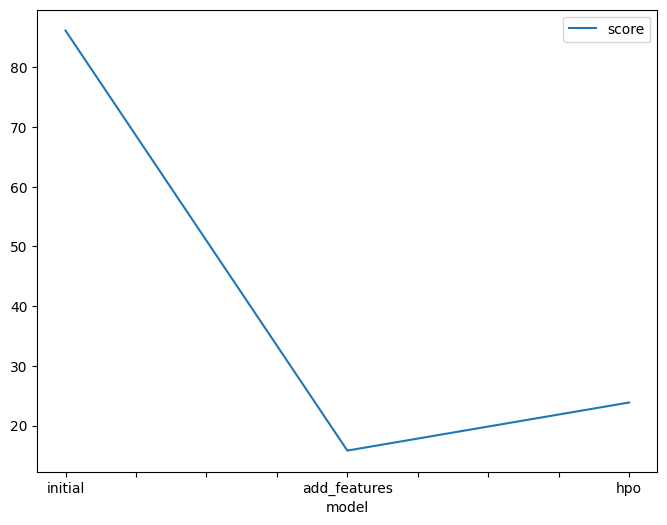

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
'''
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')
'''
#**ROOT MEAN SQUARED ERROR SCORES. RMSE calculated from train data. Not test data, as thats the KAGGLE score.

fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [86.1253, 15.8014, 23.8527]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

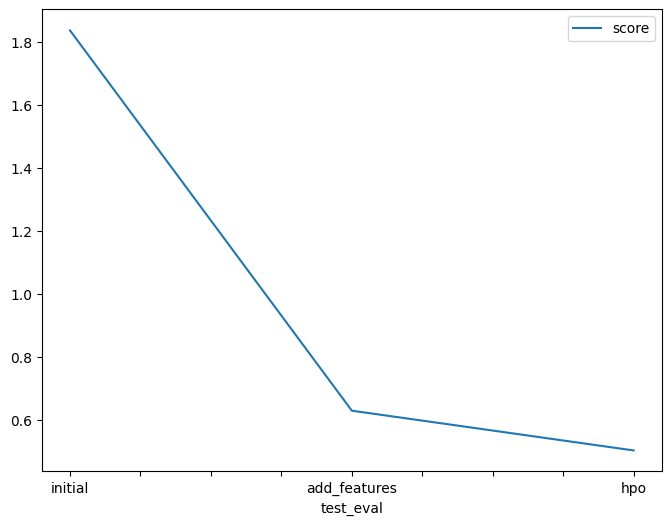

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement

#THESE ARE RMSE SCORES GENERATED BY KAGGLE FROM THE TEST DATA.

fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.83644, 0.62941, 0.50321]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
#NOT sure what to put here?

# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [?, ?, ?],
    "hpo2": [?, ?, ?],
    "hpo3": [?, ?, ?],
    "score": [?, ?, ?]
})